In [18]:
import os
import numpy as np
import matplotlib.pyplot as plt

In [24]:
# reference data
hefile = f'/mnt/c/Users/tsimk/Downloads/dotfiles/h08/camacity/dat/he__data/Global_Urban_Land_2010_upscaled.gl5'
val_data = np.fromfile(hefile, dtype='float32').reshape(2160, 4320)
# verification
ref_path = '/mnt/c/Users/tsimk/Downloads/dotfiles/h08/camacity/dat/cty_msk_/city_clrd0000.gl5'
ref = np.fromfile(ref_path, dtype='float32').reshape(2160, 4320)
# job
for num in range(1, 1861):
    msk = np.ma.masked_where(ref!=num, ref)
    grid_num = np.sum(msk)
    if grid_num == 0:
        continue
        
    count = 0
    true = 0
    false = 0
    
    for i in range(2160):
        for j in range(4320):
            if msk[i,j] != 0:
                if val_data[i,j] == 1:
                    true += 1
                else:
                    false += 1
                count += 1
    
    rate = true/count
    print(num, true, false, count, rate)

1 85 8 93 0.9139784946236559


KeyboardInterrupt: 

In [35]:
he_text = f'/mnt/c/Users/tsimk/Downloads/dotfiles/h08/camacity/dat/cty_lst_/he_validation.txt'
cama_text = f'/mnt/c/users/tsimk/downloads/dotfiles/h08/camacity/dat/cty_lst_/create_text/camacity_second.txt'

with open(he_text, 'r') as files:
    he_lines = files.readlines()
with open(cama_text, 'r') as files:
    cama_lines = files.readlines()

In [36]:
he_lines[1]

'2|0.8974358974358975|35|4|39\n'

In [43]:
true_list = []
false_list = []

for ind in range(100):
    # cama file
    line_cama = cama_lines[ind]
    parts_cama = line_cama.split('|')
    parts_cama = [item.strip() for item in parts_cama]
    ovlp_flg = parts_cama[1]
    dwn_flg = parts_cama[2]
    if ovlp_flg == 'RMVD' or dwn_flg == 'NoMK':
        continue

    # he file
    line_he = he_lines[ind]
    parts_he = line_he.split('|')
    parts_he = [item.strip() for item in parts_he]
    true_list.append(int(parts_he[2]))
    false_list.append(int(parts_he[3]))

In [44]:
print(true_list)

[85, 35, 33, 43, 33, 22, 62, 11, 22, 28, 13, 47, 13, 12, 34, 34, 40, 9, 29, 9, 49, 15, 16, 16, 45, 11, 9, 12, 36, 19, 82, 11, 20, 15, 11, 15, 20, 29, 20, 16, 21, 15, 6, 6, 7, 24, 17, 26, 38, 14, 27, 15, 9, 23, 33, 39, 19, 19, 31, 67, 11, 9, 66, 8, 25, 32, 33, 74, 7, 8, 4, 11, 4, 9, 19, 22, 10, 30, 27, 17, 6, 5, 10, 12, 33, 12, 41, 51, 9, 29, 50, 33, 48, 9, 12, 18, 13, 13, 15]


In [48]:
big = [i/(i+j) for i, j in zip(true_list[:10], false_list[:10])]
middle = [i/(i+j) for i, j in zip(true_list[10:20], false_list[10:20])]
low = [i/(i+j) for i, j in zip(true_list[20:30], false_list[20:30])]

([<matplotlib.axis.XTick at 0x7f50952afd30>,
 [Text(1, 0, 'Large'), Text(2, 0, 'middle'), Text(3, 0, 'low')])

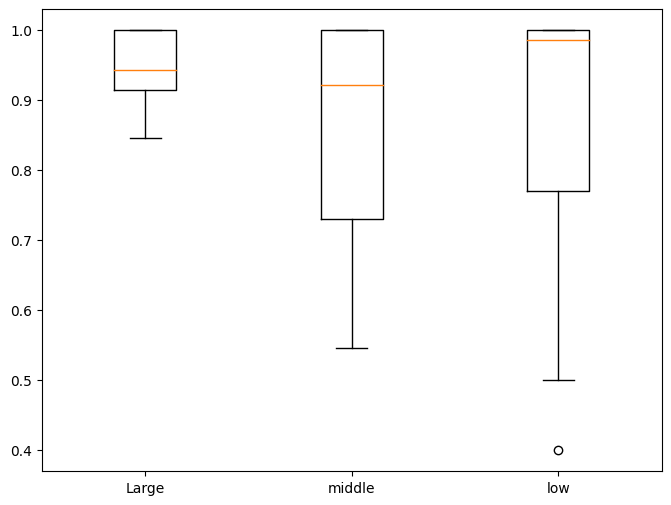

In [51]:
data = [big, middle, low]
plt.figure(figsize=(8, 6))
plt.boxplot(data)
plt.xticks([1, 2, 3,], ['Large', 'middle', 'low'])